In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

In [2]:
#importing datasets
nfl2021 = pd.read_csv('NFLData.csv', index_col=0)
nfl2021['Year'] = 2021
week13data = pd.read_csv('NFLDataWeek13.csv', index_col=0)
week13data['Year'] = 2021
nfl2020 = pd.read_csv('NFLData2020.csv', index_col=0)
nfl2020['Year'] = 2020
nfl2019 = pd.read_csv('NFLData2019.csv', index_col=0)
nfl2019['Year'] = 2019
nfl2018 = pd.read_csv('NFLData2018.csv', index_col=0)
nfl2018['Year'] = 2018
games = pd.read_csv('games.csv')
experts = pd.read_csv('ExpertsPicks.csv')

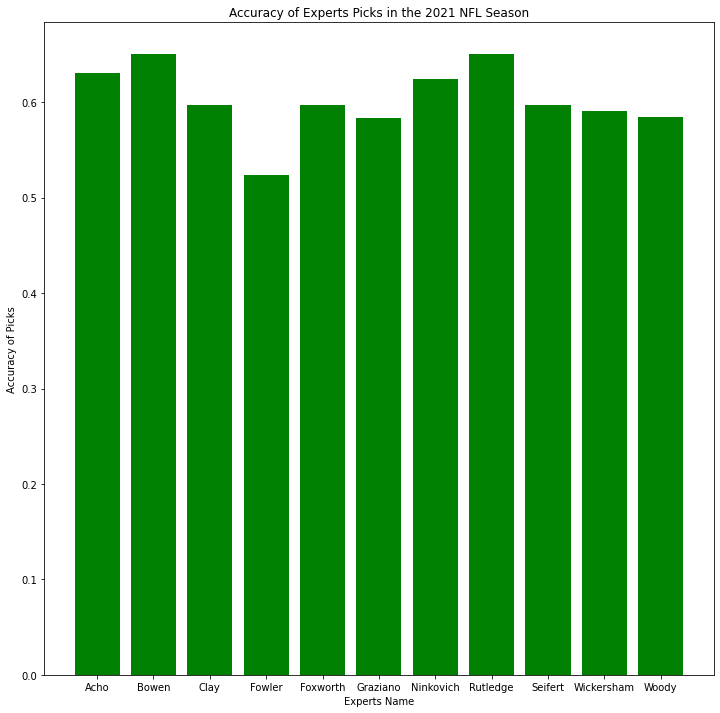

In [3]:
dfexperts = pd.DataFrame(experts)
xexperts = list(dfexperts.iloc[:, 0])
yexperts = list(dfexperts.iloc[:, 3])
plt.figure(figsize=(12,12))
plt.bar(xexperts, yexperts, color='g')
plt.title("Accuracy of Experts Picks in the 2021 NFL Season")
plt.xlabel("Experts Name")
plt.ylabel("Accuracy of Picks")

#Show the plot
plt.show()

3394
2594
136
0.55421293272371
0.42357935989549317
0.022207707380796866


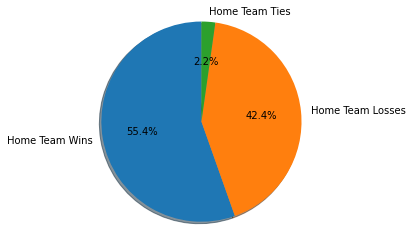

In [4]:
dfgames = pd.DataFrame(games)
HomeScores = list(dfgames.iloc[:, 10])
AwayScores = list(dfgames.iloc[:, 8])
HomeWins = 0
HomeLoss = 0
HomeTie = 0

for row in range(len(dfgames)):
    if HomeScores[row] != None and AwayScores[row] != None:
        if HomeScores[row] > AwayScores[row]:
            HomeWins += 1
        elif HomeScores[row] < AwayScores[row]:
            HomeLoss += 1
        else:
            HomeTie += 1

print(HomeWins)
print(HomeLoss)
print(HomeTie)

AggHomeWins = HomeWins/len(dfgames)
AggHomeLoss = HomeLoss/len(dfgames)
AggHomeTie = HomeTie/len(dfgames)
                      
print(AggHomeWins)
print(AggHomeLoss)
print(AggHomeTie)

aggregate = [AggHomeWins,AggHomeLoss,AggHomeTie]
labels = 'Home Team Wins','Home Team Losses', 'Home Team Ties'

plt.figure(figsize=(4,4))
plt.pie(aggregate, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [5]:
#creating data for winning record
nfl2021['winningRecord'] = nfl2021['Wins'] > nfl2021['Losses']
week13data['winningRecord'] = week13data['Wins'] > week13data['Losses']
nfl2020['winningRecord'] = nfl2020['Wins'] > nfl2020['Losses']
nfl2019['winningRecord'] = nfl2019['Wins'] > nfl2019['Losses']
nfl2018['winningRecord'] = nfl2018['Wins'] > nfl2018['Losses']

nfl2018.head()

,Conference,Points Scored/Game,Points Allowed/Game,Point Diffferntial,Wins,Losses,Percentage of Scores,Percentage of Turnovers,Third Down Conversion,Red Zone Conversion,Playoffs,Super Bowl,Year,winningRecord
Team Name,,,,,,,,,,,,,,
Arizona Cardinals,NFC,14.1,26.6,-12.5,3,13,19.3,15.0,29.1,64.3,0,0,2018,False
Atlanta Falcons,NFC,25.9,26.4,-0.5,7,9,42.9,10.7,45.3,64.0,0,0,2018,False
Baltimore Ravens,AFC,24.3,17.9,6.4,10,6,40.7,10.7,45.0,55.9,1,0,2018,True
Buffalo Bills,AFC,16.8,23.4,-6.6,6,10,26.4,15.5,31.6,59.5,0,0,2018,False
Carolina Panthers,NFC,23.5,23.9,-0.4,7,9,37.0,12.1,41.6,62.1,0,0,2018,False


In [6]:
#creating training set
data_frames = [nfl2020,nfl2019,nfl2018] #combining previous seasons
stat_total = pd.concat(data_frames) #cleaning up data
stat_total['Year'] = stat_total['Year'].astype('int')
print(stat_total)
trainSet = stat_total

                         Conference  Points Scored/Game  Points Allowed/Game  \
Team Name                                                                      
Arizona Cardinals               NFC                25.6                 22.9   
Atlanta Falcons                 NFC                24.8                 25.9   
Baltimore Ravens                AFC                29.6                 18.9   
Buffalo Bills                   AFC                31.3                 23.4   
Carolina Panthers               NFC                21.9                 25.1   
...                             ...                 ...                  ...   
San Francisco 49ers             NFC                21.4                 27.2   
Seattle Seahawks                NFC                26.8                 21.7   
Tampa Bay Buccaneers            NFC                24.8                 29.0   
Tennessee Titans                NFC                19.4                 18.9   
Washington Football Team        AFC     

In [7]:
#creating test set for week 8
nfl2021['Year'] = nfl2021['Year'].astype('int')
testSetweek8 = nfl2021
testSetweek8.head()

,Conference,Points Scored/Game,Points Allowed/Game,Point Diffferntial,Wins,Losses,Percentage of Scores,Percentage of Turnovers,Third Down Conversion,Red Zone Conversion,Playoffs,Super Bowl,Year,winningRecord
Team Name,,,,,,,,,,,,,,
Arizona Cardinals,NFC,30.8,17.3,13.5,7,1,48.2,9.4,44.0,69.4,0,0,2021,True
Atlanta Falcons,NFC,21.1,27.9,-6.8,3,4,36.8,13.2,44.2,63.6,0,0,2021,False
Baltimore Ravens,AFC,26.7,23.4,3.3,5,2,43.2,9.9,36.5,72.7,0,0,2021,True
Buffalo Bills,AFC,32.7,15.6,17.1,5,2,51.9,6.3,49.5,57.6,0,0,2021,True
Carolina Panthers,NFC,20.6,19.9,0.7,4,4,32.3,12.5,35.7,56.0,0,0,2021,False


In [8]:
#creating dataset for week 13
week13data['Year'] = week13data['Year'].astype('int')
testSetweek13 = week13data
testSetweek13.head()

,Conference,Points Scored/Game,Points Allowed/Game,Point Diffferntial,Wins,Losses,Percentage of Scores,Percentage of Turnovers,Third Down Conversion,Red Zone Conversion,Playoffs,Super Bowl,Year,winningRecord
Team Name,,,,,,,,,,,,,,
Arizona Cardinals,NFC,28.2,18.4,9.8,9,2,44.1,8.5,43.6,70.5,0,0,2021,True
Atlanta Falcons,NFC,18.1,27.5,-9.4,5,6,30.8,15.0,38.7,60.6,0,0,2021,False
Baltimore Ravens,AFC,23.9,21.8,2.1,8,3,38.9,13.0,36.6,65.7,0,0,2021,True
Buffalo Bills,AFC,29.6,16.5,13.1,7,4,47.5,12.5,50.0,61.7,0,0,2021,True
Carolina Panthers,NFC,19.7,21.1,-1.4,5,7,31.9,14.2,34.8,55.9,0,0,2021,False


In [9]:
#combining training and test data
mydataweek8 = pd.concat([testSetweek8, trainSet])
mydataweek8

,Conference,Points Scored/Game,Points Allowed/Game,Point Diffferntial,Wins,Losses,Percentage of Scores,Percentage of Turnovers,Third Down Conversion,Red Zone Conversion,Playoffs,Super Bowl,Year,winningRecord
Team Name,,,,,,,,,,,,,,
Arizona Cardinals,NFC,30.8,17.3,13.5,7,1,48.2,9.4,44.0,69.4,0,0,2021,True
Atlanta Falcons,NFC,21.1,27.9,-6.8,3,4,36.8,13.2,44.2,63.6,0,0,2021,False
Baltimore Ravens,AFC,26.7,23.4,3.3,5,2,43.2,9.9,36.5,72.7,0,0,2021,True
Buffalo Bills,AFC,32.7,15.6,17.1,5,2,51.9,6.3,49.5,57.6,0,0,2021,True
Carolina Panthers,NFC,20.6,19.9,0.7,4,4,32.3,12.5,35.7,56.0,0,0,2021,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
San Francisco 49ers,NFC,21.4,27.2,-5.8,4,12,37.0,17.1,37.8,41.2,0,0,2018,False
Seattle Seahawks,NFC,26.8,21.7,5.1,10,6,39.8,6.1,38.9,65.5,1,0,2018,True
Tampa Bay Buccaneers,NFC,24.8,29.0,-4.2,5,11,37.0,19.0,46.0,60.0,0,0,2018,False


In [10]:
#combining training and test data
mydataweek13 = pd.concat([testSetweek13, trainSet])
mydataweek13

,Conference,Points Scored/Game,Points Allowed/Game,Point Diffferntial,Wins,Losses,Percentage of Scores,Percentage of Turnovers,Third Down Conversion,Red Zone Conversion,Playoffs,Super Bowl,Year,winningRecord
Team Name,,,,,,,,,,,,,,
Arizona Cardinals,NFC,28.2,18.4,9.8,9,2,44.1,8.5,43.6,70.5,0,0,2021,True
Atlanta Falcons,NFC,18.1,27.5,-9.4,5,6,30.8,15.0,38.7,60.6,0,0,2021,False
Baltimore Ravens,AFC,23.9,21.8,2.1,8,3,38.9,13.0,36.6,65.7,0,0,2021,True
Buffalo Bills,AFC,29.6,16.5,13.1,7,4,47.5,12.5,50.0,61.7,0,0,2021,True
Carolina Panthers,NFC,19.7,21.1,-1.4,5,7,31.9,14.2,34.8,55.9,0,0,2021,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
San Francisco 49ers,NFC,21.4,27.2,-5.8,4,12,37.0,17.1,37.8,41.2,0,0,2018,False
Seattle Seahawks,NFC,26.8,21.7,5.1,10,6,39.8,6.1,38.9,65.5,1,0,2018,True
Tampa Bay Buccaneers,NFC,24.8,29.0,-4.2,5,11,37.0,19.0,46.0,60.0,0,0,2018,False


In [11]:
#setting up our training and testing variables
train_columns = ['Points Scored/Game','Points Allowed/Game','Point Diffferntial','Percentage of Scores','Percentage of Turnovers','Third Down Conversion','Red Zone Conversion']
X_week8 = np.asarray(mydataweek8[train_columns])
Y_superbowl8 = np.asarray(mydataweek8['Super Bowl'])
Y_playoffs8 = np.asarray(mydataweek8['Playoffs'])
Y_winning8 = np.asarray(mydataweek8['winningRecord'])
X_week13 = np.asarray(mydataweek13[train_columns])
Y_superbowl13 = np.asarray(mydataweek13['Super Bowl'])
Y_playoffs13 = np.asarray(mydataweek13['Playoffs'])
Y_winning13 = np.asarray(mydataweek13['winningRecord'])
print(X_week8.shape)
print(Y_superbowl8.shape)
print(Y_playoffs8.shape)
print(Y_winning8.shape)
print(X_week13.shape)
print(Y_superbowl13.shape)
print(Y_playoffs13.shape)
print(Y_winning13.shape)

(128, 7)
(128,)
(128,)
(128,)
(128, 7)
(128,)
(128,)
(128,)


In [12]:
teams = ['Arizona Cardinals','Atlanta Falcons','Baltimore Ravens','Buffalo Bills',
         'Carolina Panthers','Chicago Bears','Cincinnati Bengals','Cleveland Browns','Dallas Cowboys','Denver Broncos',
        'Detroit Lions','Green Bay Packers','Houston Texans','Indianapolis Colts','Jacksonville Jaguars','Kansas City Chiefs',
        'Las Vegas Raiders','Los Angeles Chargers','Los Angeles Rams','Miami Dolphins','Minnesota Vikings',
         'New England Patriots','New Orleans Saints','New York Giants','New York Jets','Philadelphia Eagles',
        'Pittsburgh Steelers','San Francisco 49ers','Seattle Seahawks','Tampa Bay Buccaneers','Tennessee Titans',
        'Washington Football Team'] #keep team names constant

#spilting test and training data
X_test8 = X_week8[0:32]
X_train8 = X_week8[32:]

Y_testSB8 = Y_superbowl8[0:32]
Y_trainSB8 = Y_superbowl8[32:]

Y_testPlayoffs8 = Y_playoffs8[0:32]
Y_trainPlayoffs8 = Y_playoffs8[32:]

Y_testWinning8 = Y_winning8[0:32]
Y_trainWinning8 = Y_winning8[32:]

X_test13 = X_week13[0:32]
X_train13 = X_week13[32:]

Y_testSB13 = Y_superbowl13[0:32]
Y_trainSB13 = Y_superbowl13[32:]

Y_testPlayoffs13 = Y_playoffs13[0:32]
Y_trainPlayoffs13 = Y_playoffs13[32:]

Y_testWinning13 = Y_winning13[0:32]
Y_trainWinning13 = Y_winning13[32:]

print(X_test8)
print(Y_testSB8)
print(Y_testPlayoffs8)
print(Y_testWinning8)
print(X_train8)
print(Y_trainSB8)
print(Y_trainPlayoffs8)
print(Y_trainWinning8)

[[ 30.8  17.3  13.5  48.2   9.4  44.   69.4]
 [ 21.1  27.9  -6.8  36.8  13.2  44.2  63.6]
 [ 26.7  23.4   3.3  43.2   9.9  36.5  72.7]
 [ 32.7  15.6  17.1  51.9   6.3  49.5  57.6]
 [ 20.6  19.9   0.7  32.3  12.5  35.7  56. ]
 [ 15.4  24.4  -9.   29.5  14.1  34.7  55. ]
 [ 27.5  20.3   7.2  39.8  10.8  39.2  70. ]
 [ 22.9  22.5   0.4  40.   10.   40.8  55.6]
 [ 32.1  23.1   9.   49.4  11.7  47.2  55.6]
 [ 19.6  17.1   2.5  37.5  12.5  34.7  53.8]
 [ 16.8  30.5 -13.7  30.9  13.6  34.3  50. ]
 [ 24.   20.9   3.1  43.2   7.4  42.2  57.6]
 [ 14.9  30.1 -15.2  23.9  13.6  39.4  66.7]
 [ 25.   22.9   2.1  41.9   9.3  39.6  51.6]
 [ 17.6  29.  -11.4  23.7  17.1  32.1  64.7]
 [ 26.   27.5  -1.5  44.2  23.4  54.9  57.6]
 [ 25.7  23.7   2.   42.    6.2  40.   61.5]
 [ 24.6  25.3  -0.7  39.7  11.   43.5  64.3]
 [ 30.6  21.    9.6  51.2   8.3  46.2  65.8]
 [ 17.3  29.1 -11.8  27.7  13.3  40.2  59.1]
 [ 23.3  22.4   0.9  38.1   6.   35.7  65. ]
 [ 25.8  20.5   5.3  46.5  14.   38.1  53.6]
 [ 25.1  1

In [13]:
#Fit the 2021 data to the logisitc regression model
#First do the Super Bowl odds
week8SBLR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train8,Y_trainSB8)

In [14]:
week13SBLR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train13,Y_trainSB13)

In [15]:
#Predict SB favorites with model
y_predSB8 = week8SBLR.predict(X_test8)
y_predSB8

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [16]:
#Predict SB favorites with model
y_predSB13 = week13SBLR.predict(X_test13)
y_predSB13

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [17]:
#Getting Probability estimates for each team
ypredSB8_prob = week8SBLR.predict_proba(X_test8)
ypredSB8_prob

array([[0.88915393, 0.11084607],
       [0.99449744, 0.00550256],
       [0.97580891, 0.02419109],
       [0.68617002, 0.31382998],
       [0.97456871, 0.02543129],
       [0.99355597, 0.00644403],
       [0.96410338, 0.03589662],
       [0.96649928, 0.03350072],
       [0.90530126, 0.09469874],
       [0.95056864, 0.04943136],
       [0.9956415 , 0.0043585 ],
       [0.94415556, 0.05584444],
       [0.99897465, 0.00102535],
       [0.94415672, 0.05584328],
       [0.99830184, 0.00169816],
       [0.99201945, 0.00798055],
       [0.96045832, 0.03954168],
       [0.98487394, 0.01512606],
       [0.90985602, 0.09014398],
       [0.99727827, 0.00272173],
       [0.97094673, 0.02905327],
       [0.92564442, 0.07435558],
       [0.95973053, 0.04026947],
       [0.98135211, 0.01864789],
       [0.99842791, 0.00157209],
       [0.9844553 , 0.0155447 ],
       [0.97696201, 0.02303799],
       [0.99162509, 0.00837491],
       [0.98193607, 0.01806393],
       [0.95485561, 0.04514439],
       [0.

In [18]:
#Getting Probability estimates for each team
ypredSB13_prob = week13SBLR.predict_proba(X_test13)
ypredSB13_prob

array([[0.93788727, 0.06211273],
       [0.99623369, 0.00376631],
       [0.97819097, 0.02180903],
       [0.88735704, 0.11264296],
       [0.98236041, 0.01763959],
       [0.98743621, 0.01256379],
       [0.96173144, 0.03826856],
       [0.97749786, 0.02250214],
       [0.94978207, 0.05021793],
       [0.94860197, 0.05139803],
       [0.99289736, 0.00710264],
       [0.93591563, 0.06408437],
       [0.99609479, 0.00390521],
       [0.93625685, 0.06374315],
       [0.99611514, 0.00388486],
       [0.98009743, 0.01990257],
       [0.969381  , 0.030619  ],
       [0.98418183, 0.01581817],
       [0.95741327, 0.04258673],
       [0.99084026, 0.00915974],
       [0.97799613, 0.02200387],
       [0.82822567, 0.17177433],
       [0.98624462, 0.01375538],
       [0.97353937, 0.02646063],
       [0.99790146, 0.00209854],
       [0.97897558, 0.02102442],
       [0.98755403, 0.01244597],
       [0.9850552 , 0.0149448 ],
       [0.98577408, 0.01422592],
       [0.95537219, 0.04462781],
       [0.

In [19]:
#displays the Superbowl odds
superbowloddsweek8 = pd.DataFrame({'Team':teams, 'Prediction':ypredSB8_prob[:,1]}) 

superbowloddsweek8 = superbowloddsweek8.sort_values(by = ['Prediction'], ascending = False)
superbowloddsweek8['Prediction_Rank'] = superbowloddsweek8['Prediction'].rank(ascending = False)

superbowloddsweek8

,Team,Prediction,Prediction_Rank
3,Buffalo Bills,0.313830,1.0
0,Arizona Cardinals,0.110846,2.0
8,Dallas Cowboys,0.094699,3.0
18,Los Angeles Rams,0.090144,4.0
21,New England Patriots,0.074356,5.0
11,Green Bay Packers,0.055844,6.0
13,Indianapolis Colts,0.055843,7.0
9,Denver Broncos,0.049431,8.0
29,Tampa Bay Buccaneers,0.045144,9.0
22,New Orleans Saints,0.040269,10.0


In [20]:
superbowloddsweek13 = pd.DataFrame({'Team':teams, 'Prediction':ypredSB13_prob[:,1]}) 

superbowloddsweek13 = superbowloddsweek8.sort_values(by = ['Prediction'], ascending = False)
superbowloddsweek13['Prediction_Rank'] = superbowloddsweek13['Prediction'].rank(ascending = False)

superbowloddsweek13

,Team,Prediction,Prediction_Rank
3,Buffalo Bills,0.313830,1.0
0,Arizona Cardinals,0.110846,2.0
8,Dallas Cowboys,0.094699,3.0
18,Los Angeles Rams,0.090144,4.0
21,New England Patriots,0.074356,5.0
11,Green Bay Packers,0.055844,6.0
13,Indianapolis Colts,0.055843,7.0
9,Denver Broncos,0.049431,8.0
29,Tampa Bay Buccaneers,0.045144,9.0
22,New Orleans Saints,0.040269,10.0


In [21]:
#Fit the 2021 data to the logisitc regression model
#Playoff odds
week8PLR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train8,Y_trainPlayoffs8)

In [22]:
week13PLR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train13,Y_trainPlayoffs13)

In [23]:
#Predict playoff odds with model
y_predP8 = week8PLR.predict(X_test8)
y_predP8

array([1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0], dtype=int64)

In [24]:
#Predict playoff odds with model
y_predP13 = week13PLR.predict(X_test13)
y_predP13

array([1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0], dtype=int64)

In [25]:
#Getting Probability estimates for each team
ypredP8_prob = week8PLR.predict_proba(X_test8)
ypredP8_prob

array([[0.01092968, 0.98907032],
       [0.96111488, 0.03888512],
       [0.27191224, 0.72808776],
       [0.00318468, 0.99681532],
       [0.65052956, 0.34947044],
       [0.98337864, 0.01662136],
       [0.11211512, 0.88788488],
       [0.6107011 , 0.3892989 ],
       [0.13417503, 0.86582497],
       [0.44362647, 0.55637353],
       [0.99775916, 0.00224084],
       [0.27507662, 0.72492338],
       [0.99758902, 0.00241098],
       [0.50850965, 0.49149035],
       [0.99560677, 0.00439323],
       [0.95706705, 0.04293295],
       [0.34450787, 0.65549213],
       [0.70350734, 0.29649266],
       [0.04151824, 0.95848176],
       [0.99412715, 0.00587285],
       [0.37002549, 0.62997451],
       [0.33973865, 0.66026135],
       [0.08524444, 0.91475556],
       [0.94904208, 0.05095792],
       [0.99823504, 0.00176496],
       [0.37565379, 0.62434621],
       [0.68868632, 0.31131368],
       [0.62081391, 0.37918609],
       [0.22183625, 0.77816375],
       [0.07949176, 0.92050824],
       [0.

In [26]:
#Getting Probability estimates for each team
ypredP13_prob = week13PLR.predict_proba(X_test13)
ypredP13_prob

array([[0.03142982, 0.96857018],
       [0.98779819, 0.01220181],
       [0.49159313, 0.50840687],
       [0.02272804, 0.97727196],
       [0.82725183, 0.17274817],
       [0.96517645, 0.03482355],
       [0.11235898, 0.88764102],
       [0.73261971, 0.26738029],
       [0.19426428, 0.80573572],
       [0.37395044, 0.62604956],
       [0.99066585, 0.00933415],
       [0.25062724, 0.74937276],
       [0.99443028, 0.00556972],
       [0.29175937, 0.70824063],
       [0.99154003, 0.00845997],
       [0.65707449, 0.34292551],
       [0.88573888, 0.11426112],
       [0.78630921, 0.21369079],
       [0.40906474, 0.59093526],
       [0.90607424, 0.09392576],
       [0.44924814, 0.55075186],
       [0.02905386, 0.97094614],
       [0.44733621, 0.55266379],
       [0.93978389, 0.06021611],
       [0.99818497, 0.00181503],
       [0.40005967, 0.59994033],
       [0.86617103, 0.13382897],
       [0.30418628, 0.69581372],
       [0.51120519, 0.48879481],
       [0.123011  , 0.876989  ],
       [0.

In [27]:
#displays the Playoff odds
playoffoddsweek8 = pd.DataFrame({'Team':teams, 'Prediction':ypredP8_prob[:,1]}) 

playoffoddsweek8 = playoffoddsweek8.sort_values(by = ['Prediction'], ascending = False)
playoffoddsweek8['Prediction_Rank'] = playoffoddsweek8['Prediction'].rank(ascending = False)

playoffoddsweek8

,Team,Prediction,Prediction_Rank
3,Buffalo Bills,0.996815,1.0
0,Arizona Cardinals,0.989070,2.0
18,Los Angeles Rams,0.958482,3.0
29,Tampa Bay Buccaneers,0.920508,4.0
22,New Orleans Saints,0.914756,5.0
6,Cincinnati Bengals,0.887885,6.0
8,Dallas Cowboys,0.865825,7.0
28,Seattle Seahawks,0.778164,8.0
2,Baltimore Ravens,0.728088,9.0
11,Green Bay Packers,0.724923,10.0


In [28]:
#displays the Playoff odds
playoffoddsweek13 = pd.DataFrame({'Team':teams, 'Prediction':ypredP13_prob[:,1]}) 

playoffoddsweek13 = playoffoddsweek13.sort_values(by = ['Prediction'], ascending = False)
playoffoddsweek13['Prediction_Rank'] = playoffoddsweek13['Prediction'].rank(ascending = False)

playoffoddsweek13

,Team,Prediction,Prediction_Rank
3,Buffalo Bills,0.977272,1.0
21,New England Patriots,0.970946,2.0
0,Arizona Cardinals,0.968570,3.0
6,Cincinnati Bengals,0.887641,4.0
29,Tampa Bay Buccaneers,0.876989,5.0
8,Dallas Cowboys,0.805736,6.0
11,Green Bay Packers,0.749373,7.0
13,Indianapolis Colts,0.708241,8.0
27,San Francisco 49ers,0.695814,9.0
9,Denver Broncos,0.626050,10.0


In [29]:
week8WLR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train8,Y_trainWinning8)

In [30]:
week13WLR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train13,Y_trainWinning13)

In [31]:
#Predict winning record with model
y_predW8 = week8WLR.predict(X_test8)
y_predW8

array([ True, False,  True,  True, False, False,  True, False,  True,
        True, False,  True, False,  True, False, False,  True, False,
        True, False,  True,  True,  True, False, False,  True, False,
       False,  True,  True,  True, False])

In [32]:
#Predict winning record with model
y_predW13 = week13WLR.predict(X_test13)
y_predW13

array([ True, False,  True,  True, False, False,  True, False,  True,
        True, False,  True, False,  True, False, False, False, False,
        True, False,  True,  True,  True, False, False,  True, False,
        True,  True,  True, False, False])

In [33]:
#Getting Probability estimates for each team
ypredW8_prob = week8WLR.predict_proba(X_test8)
ypredW8_prob

array([[0.00564169, 0.99435831],
       [0.9567101 , 0.0432899 ],
       [0.2176576 , 0.7823424 ],
       [0.00173948, 0.99826052],
       [0.56731667, 0.43268333],
       [0.98317188, 0.01682812],
       [0.06495628, 0.93504372],
       [0.57853446, 0.42146554],
       [0.1046611 , 0.8953389 ],
       [0.38619435, 0.61380565],
       [0.99842815, 0.00157185],
       [0.2405463 , 0.7594537 ],
       [0.99722547, 0.00277453],
       [0.49661135, 0.50338865],
       [0.99478776, 0.00521224],
       [0.94377657, 0.05622343],
       [0.31133283, 0.68866717],
       [0.64834804, 0.35165196],
       [0.02915043, 0.97084957],
       [0.993749  , 0.006251  ],
       [0.32115405, 0.67884595],
       [0.31899666, 0.68100334],
       [0.04502703, 0.95497297],
       [0.9535773 , 0.0464227 ],
       [0.99798917, 0.00201083],
       [0.27820904, 0.72179096],
       [0.62200544, 0.37799456],
       [0.54297684, 0.45702316],
       [0.14820588, 0.85179412],
       [0.04229387, 0.95770613],
       [0.

In [34]:
#Getting Probability estimates for each team
ypredW13_prob = week13WLR.predict_proba(X_test13)
ypredW13_prob

array([[0.01672728, 0.98327272],
       [0.98676276, 0.01323724],
       [0.40924219, 0.59075781],
       [0.01129876, 0.98870124],
       [0.78516862, 0.21483138],
       [0.96526663, 0.03473337],
       [0.06776883, 0.93223117],
       [0.69472851, 0.30527149],
       [0.13917671, 0.86082329],
       [0.30986293, 0.69013707],
       [0.99181138, 0.00818862],
       [0.21302353, 0.78697647],
       [0.99403877, 0.00596123],
       [0.26598049, 0.73401951],
       [0.99040782, 0.00959218],
       [0.55175608, 0.44824392],
       [0.90933694, 0.09066306],
       [0.76596578, 0.23403422],
       [0.37879082, 0.62120918],
       [0.86929307, 0.13070693],
       [0.40225687, 0.59774313],
       [0.01883639, 0.98116361],
       [0.32972618, 0.67027382],
       [0.94507199, 0.05492801],
       [0.99817747, 0.00182253],
       [0.29518049, 0.70481951],
       [0.84420007, 0.15579993],
       [0.21617857, 0.78382143],
       [0.40029319, 0.59970681],
       [0.07492578, 0.92507422],
       [0.

In [35]:
#displays the Playoff odds
winningrecordweek8 = pd.DataFrame({'Team':teams, 'Prediction':ypredW8_prob[:,1]}) 

winningrecordweek8 = winningrecordweek8.sort_values(by = ['Prediction'], ascending = False)
winningrecordweek8['Prediction_Rank'] = winningrecordweek8['Prediction'].rank(ascending = False)

winningrecordweek8

,Team,Prediction,Prediction_Rank
3,Buffalo Bills,0.998261,1.0
0,Arizona Cardinals,0.994358,2.0
18,Los Angeles Rams,0.970850,3.0
29,Tampa Bay Buccaneers,0.957706,4.0
22,New Orleans Saints,0.954973,5.0
6,Cincinnati Bengals,0.935044,6.0
8,Dallas Cowboys,0.895339,7.0
28,Seattle Seahawks,0.851794,8.0
2,Baltimore Ravens,0.782342,9.0
11,Green Bay Packers,0.759454,10.0


In [36]:
#displays the Playoff odds
winningrecordweek13 = pd.DataFrame({'Team':teams, 'Prediction':ypredW13_prob[:,1]}) 

winningrecordweek13 = winningrecordweek13.sort_values(by = ['Prediction'], ascending = False)
winningrecordweek13['Prediction_Rank'] = winningrecordweek13['Prediction'].rank(ascending = False)

winningrecordweek13

,Team,Prediction,Prediction_Rank
3,Buffalo Bills,0.988701,1.0
0,Arizona Cardinals,0.983273,2.0
21,New England Patriots,0.981164,3.0
6,Cincinnati Bengals,0.932231,4.0
29,Tampa Bay Buccaneers,0.925074,5.0
8,Dallas Cowboys,0.860823,6.0
11,Green Bay Packers,0.786976,7.0
27,San Francisco 49ers,0.783821,8.0
13,Indianapolis Colts,0.734020,9.0
25,Philadelphia Eagles,0.704820,10.0


In [37]:
pointdiff2020 = nfl2020.sort_values(
    by=["Point Diffferntial"],
    ascending=[False]
)[["Point Diffferntial"]]

best_off2020 = nfl2020.sort_values(
    by=["Points Scored/Game"],
    ascending=[False]
)[["Points Scored/Game"]]

best_def2020 = nfl2020.sort_values(
    by=["Points Allowed/Game"],
    ascending=[False]
)[["Points Allowed/Game"]]

best_on_third_down2020 = nfl2020.sort_values(
    by=["Third Down Conversion"],
    ascending=[False]
)[["Third Down Conversion"]]

redzone_conversion_percentage2020 = nfl2020.sort_values(
    by=["Red Zone Conversion"],
    ascending=[False]
)[["Red Zone Conversion"]]

# Best in each category
print(pointdiff2020)
print(best_off2020)
print(best_def2020)
print(best_on_third_down2020)
print(redzone_conversion_percentage2020)

                          Point Diffferntial
Team Name                                   
Baltimore Ravens                        10.7
New Orleans Saints                       9.0
Green Bay Packers                        8.7
Tampa Bay Buccaneers                     8.6
Buffalo Bills                            7.9
Kansas City Chiefs                       7.0
Pittsburgh Steelers                      6.5
Indianapolis Colts                       5.6
Seattle Seahawks                         5.5
Los Angeles Rams                         4.8
Miami Dolphins                           4.2
Tennessee Titans                         3.3
Arizona Cardinals                        2.7
Washington Football Team                 0.3
Chicago Bears                            0.2
Cleveland Browns                        -0.7
San Francisco 49ers                     -0.9
Atlanta Falcons                         -1.1
New England Patriots                    -1.7
Los Angeles Chargers                    -2.6
Las Vegas 

In [38]:
pointdiff2021 = nfl2021.sort_values(
    by=["Point Diffferntial"],
    ascending=[False]
)[["Point Diffferntial"]]

best_off2021 = nfl2021.sort_values(
    by=["Points Scored/Game"],
    ascending=[False]
)[["Points Scored/Game"]]

best_def2021 = nfl2021.sort_values(
    by=["Points Allowed/Game"],
    ascending=[False]
)[["Points Allowed/Game"]]

best_on_third_down2021 = nfl2021.sort_values(
    by=["Third Down Conversion"],
    ascending=[False]
)[["Third Down Conversion"]]

redzone_conversion_percentage2021 = nfl2021.sort_values(
    by=["Red Zone Conversion"],
    ascending=[False]
)[["Red Zone Conversion"]]

# Best in each category
print(pointdiff2021)
print(best_off2021)
print(best_def2021)
print(best_on_third_down2021)
print(redzone_conversion_percentage2021)

                          Point Diffferntial
Team Name                                   
Buffalo Bills                           17.1
Arizona Cardinals                       13.5
Tampa Bay Buccaneers                     9.6
Los Angeles Rams                         9.6
Dallas Cowboys                           9.0
Cincinnati Bengals                       7.2
New Orleans Saints                       6.8
New England Patriots                     5.3
Tennessee Titans                         4.0
Baltimore Ravens                         3.3
Green Bay Packers                        3.1
Denver Broncos                           2.5
Indianapolis Colts                       2.1
Las Vegas Raiders                        2.0
Philadelphia Eagles                      1.5
Seattle Seahawks                         1.5
Minnesota Vikings                        0.9
Carolina Panthers                        0.7
Cleveland Browns                         0.4
San Francisco 49ers                     -0.4
Los Angele